In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
sys.path.append('../')
from function import * 
data_rev = pd.read_csv('eCO2mix_RTE_energie_M.csv',sep=';', encoding='cp1252')
data_chauf = pd.read_csv('data_temp.csv',sep=',')

In [2]:
data_chauf.head()

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2020,353.15,267.40,284.20,132.64,83.70,40.26,0.00,0.00,0.00,0.00,0.00,0.00,1161.18
1,2019,433.98,293.52,264.23,207.90,149.24,36.37,5.26,9.29,41.97,115.00,294.83,324.75,2176.13
2,2018,316.38,423.58,321.90,145.93,87.51,18.29,2.44,10.37,38.10,139.47,270.65,336.34,2110.72
3,2017,483.25,288.33,234.50,218.03,92.85,18.59,9.12,16.26,79.72,121.32,310.53,395.05,2267.21
4,2016,357.85,325.94,330.82,226.00,118.73,37.80,14.14,10.66,26.93,185.46,288.59,396.40,2319.06


In [3]:
data_rev = data_rev[(data_rev['Territoire'] == 'France')&(data_rev['Mois'] <= '2020-06')]

In [4]:
data_conso = data_rev[['Mois','Consommation totale']]

In [5]:
data_chauf = pd.melt(data_chauf,id_vars=['Unnamed: 0'],value_vars = ['JAN','FÉV','MAR','AVR','MAI','JUN','JUI','AOÛ','SEP','OCT','NOV','DÉC'],value_name = 'température')
data_chauf = data_chauf.rename(columns={'variable':'Mois','Unnamed: 0':'Année'})

In [6]:
list_mois = ['JUI','AOÛ','SEP','OCT','NOV','DÉC']
for i in list(data_chauf['Mois'].unique()):
    if i in list_mois:
        inde_a_sup = data_chauf[(data_chauf['Année'] == 2020)&(data_chauf['Mois'] == i)].index
        print(inde_a_sup)
        data_chauf.drop(inde_a_sup,axis=0,inplace = True)
        
data_chauf['température'] = np.around(data_chauf['température'],decimals = 0)
data_chauf['température'] = data_chauf['température'].astype(int)

data_conso['Consommation totale'] = data_conso['Consommation totale'].astype(int)


Int64Index([72], dtype='int64')
Int64Index([84], dtype='int64')
Int64Index([96], dtype='int64')
Int64Index([108], dtype='int64')
Int64Index([120], dtype='int64')
Int64Index([132], dtype='int64')


<ipython-input-6-42ef122ac5be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_conso['Consommation totale'] = data_conso['Consommation totale'].astype(int)


In [7]:
for i in list(data_chauf['Année'].unique()):
    print(i,data_chauf[data_chauf['Année'] == i]['Mois'].unique())

2020 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN']
2019 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2018 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2017 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2016 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2015 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2014 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2013 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2012 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2011 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2010 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']
2009 ['JAN' 'FÉV' 'MAR' 'AVR' 'MAI' 'JUN' 'JUI' 'AOÛ' 'SEP' 'OCT' 'NOV' 'DÉC']


In [8]:
data_conso

,Mois,Consommation totale
0,2012-01,51086
1,2012-02,54476
2,2012-03,43156
3,2012-04,40176
4,2012-05,35257
...,...,...
1123,2020-02,43358
1136,2020-03,41486
1149,2020-04,30658
1162,2020-05,30622


In [9]:
année = []
mois = []
datetime = []
data_conso = data_conso.rename(columns = {'Mois':'date'})
for i in list(data_conso['date']):
    année.append(i.split('-')[0])
    mois.append(i.split('-')[1])
    datetime.append(pd.datetime(int(i.split('-')[0]),int(i.split('-')[1]),1))
data_conso['Année'] = année
data_conso['Mois'] = mois
data_conso['date'] = datetime
data_conso = data_conso[['date','Année','Mois','Consommation totale']]
data_conso['Année'] = data_conso['Année'].astype(int)

<ipython-input-9-5e9fa6562e83>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datetime.append(pd.datetime(int(i.split('-')[0]),int(i.split('-')[1]),1))


In [10]:
data_chauf['Mois'].unique()

array(['JAN', 'FÉV', 'MAR', 'AVR', 'MAI', 'JUN', 'JUI', 'AOÛ', 'SEP',
       'OCT', 'NOV', 'DÉC'], dtype=object)

In [11]:
for i,a in zip(data_conso['Mois'].unique(),data_chauf['Mois'].unique()):
    data_conso = data_conso.replace(i,a)

In [12]:
print(data_chauf.dtypes)
print(data_conso.dtypes)

Année           int64
Mois           object
température     int32
dtype: object
date                   datetime64[ns]
Année                           int32
Mois                           object
Consommation totale             int32
dtype: object


In [13]:
merge_cons_temp = pd.merge(data_conso,data_chauf,how='inner',on=['Année','Mois'])

In [14]:
merge_cons_temp = merge_cons_temp.rename(columns={'Consommation totale':'Consommation_totale'})

In [15]:
merge_cons_temp

,date,Année,Mois,Consommation_totale,température
0,2012-01-01,2012,JAN,51086,367
1,2012-02-01,2012,FÉV,54476,471
2,2012-03-01,2012,MAR,43156,241
3,2012-04-01,2012,AVR,40176,234
4,2012-05-01,2012,MAI,35257,101
...,...,...,...,...,...
97,2020-02-01,2020,FÉV,43358,267
98,2020-03-01,2020,MAR,41486,284
99,2020-04-01,2020,AVR,30658,133
100,2020-05-01,2020,MAI,30622,84


## Regression linéaire 

In [16]:
merge_cons_temp

,date,Année,Mois,Consommation_totale,température
0,2012-01-01,2012,JAN,51086,367
1,2012-02-01,2012,FÉV,54476,471
2,2012-03-01,2012,MAR,43156,241
3,2012-04-01,2012,AVR,40176,234
4,2012-05-01,2012,MAI,35257,101
...,...,...,...,...,...
97,2020-02-01,2020,FÉV,43358,267
98,2020-03-01,2020,MAR,41486,284
99,2020-04-01,2020,AVR,30658,133
100,2020-05-01,2020,MAI,30622,84


In [17]:
reg_simp = smf.ols('Consommation_totale~température', data=merge_cons_temp).fit()

In [18]:
reg_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Consommation_totale   R-squared:                       0.935
Model:                             OLS   Adj. R-squared:                  0.934
Method:                  Least Squares   F-statistic:                     1428.
Date:                 Mon, 17 May 2021   Prob (F-statistic):           5.12e-61
Time:                         18:04:24   Log-Likelihood:                -910.16
No. Observations:                  102   AIC:                             1824.
Df Residuals:                      100   BIC:                             1830.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.077e+04    302.065    101.870      0.000    3.02e+04    3.14e+04
température    48.8251      1.292     37.789      0.000      46.262      51.389
==============================================================================
Omnibus:                        7.828   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.386
Skew:                          -0.475   Prob(JB):                       0.0151
Kurtosis:                       4.034   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Avant correction 

In [19]:
# avant correction
merge_cons_temp['predict'] = reg_simp.predict()

In [20]:
merge_cons_temp

,date,Année,Mois,Consommation_totale,température,predict
0,2012-01-01,2012,JAN,51086,367,48690.113890
1,2012-02-01,2012,FÉV,54476,471,53767.927568
2,2012-03-01,2012,MAR,43156,241,42538.147319
3,2012-04-01,2012,AVR,40176,234,42196.371398
4,2012-05-01,2012,MAI,35257,101,35702.628906
...,...,...,...,...,...,...
97,2020-02-01,2020,FÉV,43358,267,43807.600738
98,2020-03-01,2020,MAR,41486,284,44637.627974
99,2020-04-01,2020,AVR,30658,133,37265.033115
100,2020-05-01,2020,MAI,30622,84,34872.601670


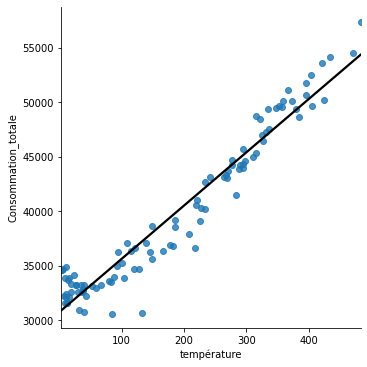

In [21]:
sns.lmplot(x='température', y='Consommation_totale', data=merge_cons_temp, ci=None, line_kws={'color':'black'})

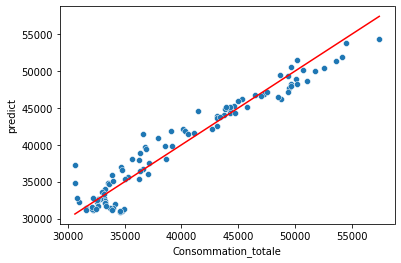

In [22]:
X_plot = [merge_cons_temp['Consommation_totale'].min(), merge_cons_temp['Consommation_totale'].max()]
sns.scatterplot(x="Consommation_totale", y="predict", data=merge_cons_temp)
plt.plot(X_plot, X_plot, color='r')
plt.show()

C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='predict'>

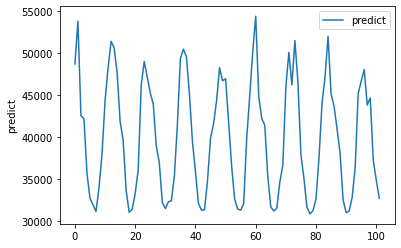

In [23]:
sns.lineplot(merge_cons_temp.index,merge_cons_temp['predict'],label='predict')

In [24]:
merge_cons_temp['residus'] = reg_simp.resid
merge_cons_temp['residus_standardisé'] = reg_simp.get_influence().resid_studentized_internal

In [25]:
shapiro(merge_cons_temp['residus'])
print(' ')
print(' ')
shapiro(merge_cons_temp['residus_standardisé'])

- Test de Shapiro-Wilk :
 
Valeur critique :  0.08102891594171524
 
Sachant que les données sont normalement distribuées, l'hypothèse 0 n'est pas rejetée.
 
 
- Test de Shapiro-Wilk :
 
Valeur critique :  0.08784178644418716
 
Sachant que les données sont normalement distribuées, l'hypothèse 0 n'est pas rejetée.


In [26]:
data_chauf

,Année,Mois,température
0,2020,JAN,353
1,2019,JAN,434
2,2018,JAN,316
3,2017,JAN,483
4,2016,JAN,358
...,...,...,...
139,2013,DÉC,373
140,2012,DÉC,357
141,2011,DÉC,322
142,2010,DÉC,473


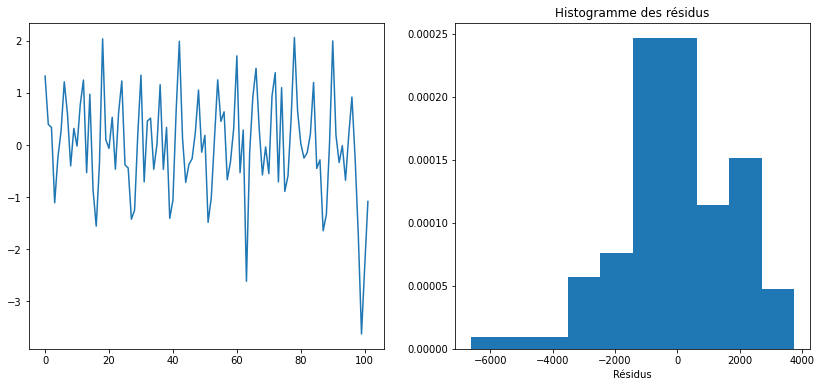

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(merge_cons_temp['residus_standardisé'])
plt.subplot(122)
plt.hist(merge_cons_temp['residus'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

### Bruit blanc 

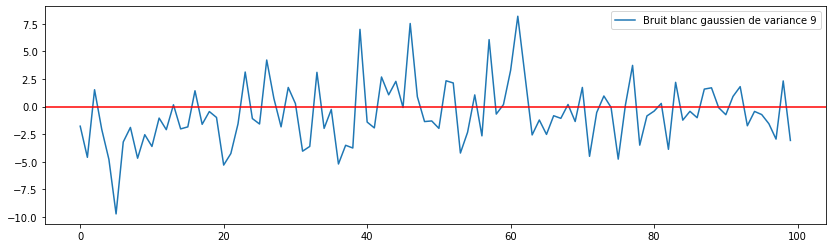

In [28]:
norm = pd.DataFrame({'Bruit blanc gaussien de variance 9': np.random.normal(scale=3, size=100), 't': range(100)})
norm.set_index('t')
norm.plot(y='Bruit blanc gaussien de variance 9', figsize=(14,4))
plt.axhline(y=0, color='r', linestyle='-')

In [29]:
merge_2019 = merge_cons_temp[merge_cons_temp['Année'] == 2019]

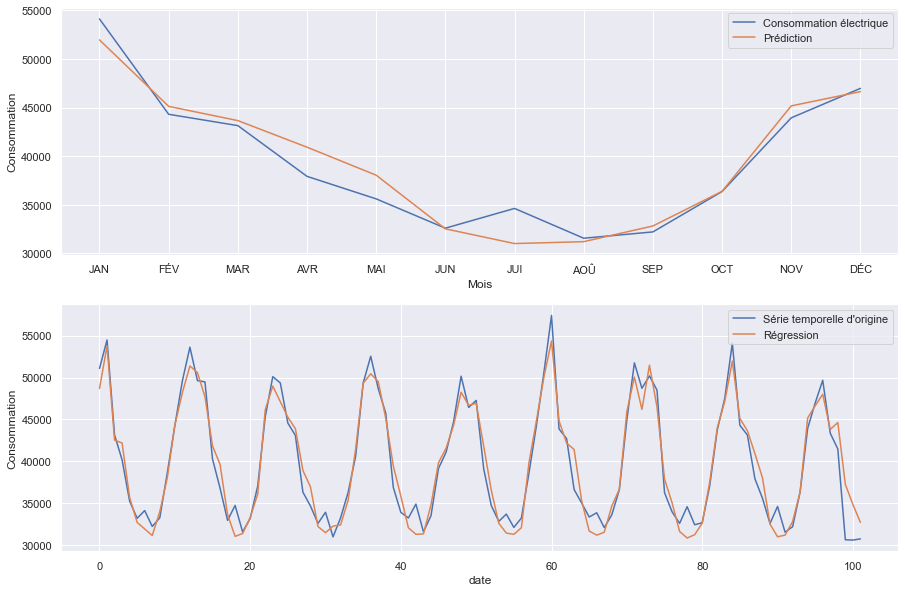

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(211)
plt.plot(merge_2019['Mois'],merge_2019['Consommation_totale'],label='Consommation électrique')
plt.plot(merge_2019['Mois'],merge_2019['predict'],label='Prédiction')
plt.ylabel('Consommation')
plt.xlabel('Mois')
plt.legend()
plt.subplot(212)
plt.plot(merge_cons_temp.index,merge_cons_temp['Consommation_totale'],label="Série temporelle d'origine")
plt.plot(merge_cons_temp.index,merge_cons_temp['predict'],label='Régression')
plt.ylabel('Consommation')
plt.xlabel('date')
plt.legend()
plt.savefig('C:/Users/gormt/Documents/OC/P09_Théo_Fauvel/capture_reg_avant-après.jpg')
plt.show()

#### Après correction 

In [31]:
merge_cons_temp.head()

,date,Année,Mois,Consommation_totale,température,predict,residus,residus_standardisé
0,2012-01-01,2012,JAN,51086,367,48690.113890,2395.886110,1.323871
1,2012-02-01,2012,FÉV,54476,471,53767.927568,708.072432,0.396158
2,2012-03-01,2012,MAR,43156,241,42538.147319,617.852681,0.338861
3,2012-04-01,2012,AVR,40176,234,42196.371398,-2020.371398,-1.107873
4,2012-05-01,2012,MAI,35257,101,35702.628906,-445.628906,-0.244677


In [32]:
année = list(merge_cons_temp['Année'].unique())

In [33]:
impair = ['JAN','MAR','MAI','JUI','AOÛ','OCT','DÉC']
pair = ['AVR','JUN','SEP','NOV']
autre = ['FÉV']

In [34]:
list_temperature = []
x = 0
for i in list(merge_cons_temp['Mois']):
    if i in impair:
        list_temperature.append(merge_cons_temp['température'][x]/31)
    elif i in pair:
        list_temperature.append(merge_cons_temp['température'][x]/30)
    elif i in autre:
        list_temperature.append(merge_cons_temp['température'][x]/28)
    x = x + 1
        
# list_temperature_fin = []
# for i in list_temperature: 
#     for a in i:
#         list_temperature_fin.append(a)
len(list_temperature)
#pd.concat(list_temperature)
merge_cons_temp['température_moy'] = list_temperature

In [35]:
merge_cons_temp

,date,Année,Mois,Consommation_totale,température,predict,residus,residus_standardisé,température_moy
0,2012-01-01,2012,JAN,51086,367,48690.113890,2395.886110,1.323871,11.838710
1,2012-02-01,2012,FÉV,54476,471,53767.927568,708.072432,0.396158,16.821429
2,2012-03-01,2012,MAR,43156,241,42538.147319,617.852681,0.338861,7.774194
3,2012-04-01,2012,AVR,40176,234,42196.371398,-2020.371398,-1.107873,7.800000
4,2012-05-01,2012,MAI,35257,101,35702.628906,-445.628906,-0.244677,3.258065
...,...,...,...,...,...,...,...,...,...
97,2020-02-01,2020,FÉV,43358,267,43807.600738,-449.600738,-0.246800,9.535714
98,2020-03-01,2020,MAR,41486,284,44637.627974,-3151.627974,-1.731338,9.161290
99,2020-04-01,2020,AVR,30658,133,37265.033115,-6607.033115,-3.623590,4.433333
100,2020-05-01,2020,MAI,30622,84,34872.601670,-4250.601670,-2.335725,2.709677


In [36]:
list_conso_corrigée = []
#for i in année:
temp = np.square((merge_cons_temp['température_moy']/merge_cons_temp['température_moy'].mean()))*merge_cons_temp['température'] 
merge_cons_temp['serie_cor'] = merge_cons_temp['Consommation_totale'] - temp
#merge_cons_temp['Consommation_totale'] - (merge_cons_temp['température']/merge_cons_temp['température'].mean())*merge_cons_temp['température']

C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


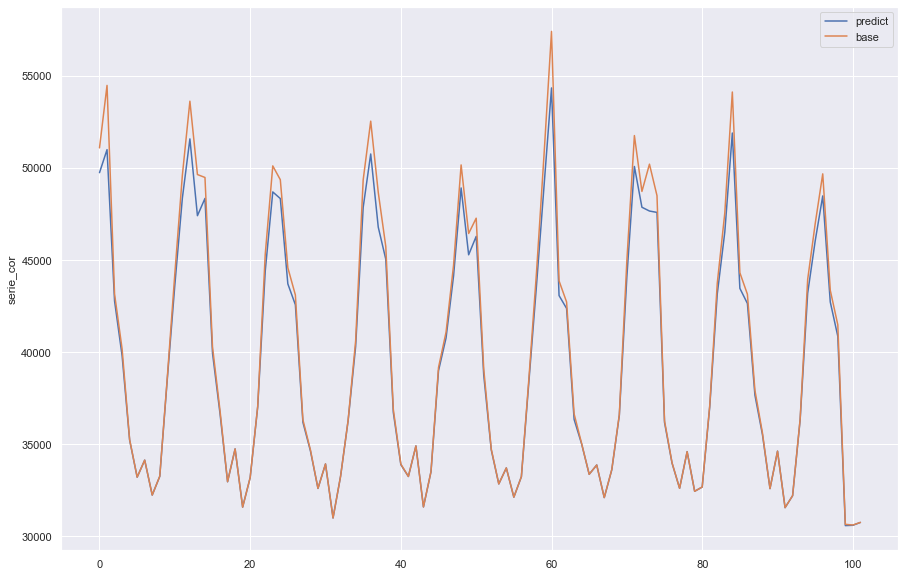

In [37]:
sns.lineplot(merge_cons_temp.index,merge_cons_temp['serie_cor'],label='predict')
sns.lineplot(merge_cons_temp.index,merge_cons_temp['Consommation_totale'],label='base')
plt.show()

## Désaisonnalisation de la consommation électrique 

### Stationnarité de la série temporelle  

#### Avant correction 

In [38]:
merge_cons_temp

,date,Année,Mois,Consommation_totale,température,predict,residus,residus_standardisé,température_moy,serie_cor
0,2012-01-01,2012,JAN,51086,367,48690.113890,2395.886110,1.323871,11.838710,49740.670250
1,2012-02-01,2012,FÉV,54476,471,53767.927568,708.072432,0.396158,16.821429,50990.214975
2,2012-03-01,2012,MAR,43156,241,42538.147319,617.852681,0.338861,7.774194,42775.037980
3,2012-04-01,2012,AVR,40176,234,42196.371398,-2020.371398,-1.107873,7.800000,39803.643445
4,2012-05-01,2012,MAI,35257,101,35702.628906,-445.628906,-0.244677,3.258065,35228.958924
...,...,...,...,...,...,...,...,...,...,...
97,2020-02-01,2020,FÉV,43358,267,43807.600738,-449.600738,-0.246800,9.535714,42723.003016
98,2020-03-01,2020,MAR,41486,284,44637.627974,-3151.627974,-1.731338,9.161290,40862.573048
99,2020-04-01,2020,AVR,30658,133,37265.033115,-6607.033115,-3.623590,4.433333,30589.629878
100,2020-05-01,2020,MAI,30622,84,34872.601670,-4250.601670,-2.335725,2.709677,30605.868736


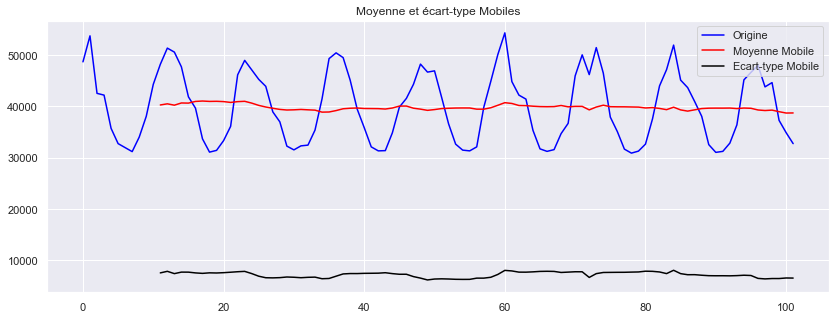

 
 
Statistiques ADF : -1.7797052335353647
p-value : 0.39058300779871824
Valeurs Critiques :
	1%: -3.506057133647011
	5%: -2.8946066061911946
	10%: -2.5844100201994697
 
La série temporelle n'est pas stationnaire


In [39]:
get_stationarity(merge_cons_temp['predict'])

### Moyennes mobiles  

In [40]:
list_df_mois = []
for i in list(merge_cons_temp['Année'].unique()):
    list_df_mois.append(merge_cons_temp[merge_cons_temp['Année'] == i])

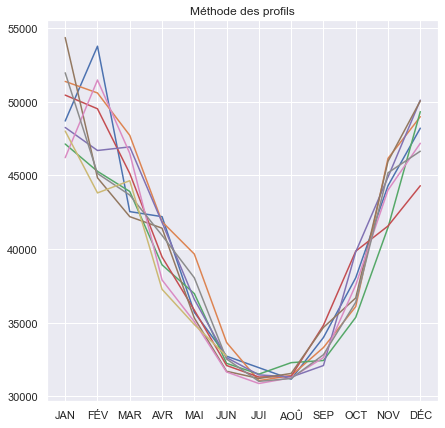

In [41]:
sns.set(rc={'figure.figsize':(7,7)})
for i in range(0,len(list_df_mois)):
    plt.plot(list_df_mois[i]['Mois'],list_df_mois[i]['predict'],label=list_df_mois[i]['Année'].unique())
    
plt.title('Méthode des profils')
plt.show()

Les droites ne sont pas parallèles donc le modèle est multiplicatif

In [42]:
#merge_cons_temp.drop(['Année','Mois'],axis=1,inplace = True)
#merge_cons_temp = merge_cons_temp[['date','Année','Mois','Consommation_totale','température','predict','residus']]

In [43]:
merge_17_19 = merge_cons_temp[(merge_cons_temp['Année'] >= 2017)&(merge_cons_temp['Année'] <= 2019)]

In [44]:
merge_cons_temp

,date,Année,Mois,Consommation_totale,température,predict,residus,residus_standardisé,température_moy,serie_cor
0,2012-01-01,2012,JAN,51086,367,48690.113890,2395.886110,1.323871,11.838710,49740.670250
1,2012-02-01,2012,FÉV,54476,471,53767.927568,708.072432,0.396158,16.821429,50990.214975
2,2012-03-01,2012,MAR,43156,241,42538.147319,617.852681,0.338861,7.774194,42775.037980
3,2012-04-01,2012,AVR,40176,234,42196.371398,-2020.371398,-1.107873,7.800000,39803.643445
4,2012-05-01,2012,MAI,35257,101,35702.628906,-445.628906,-0.244677,3.258065,35228.958924
...,...,...,...,...,...,...,...,...,...,...
97,2020-02-01,2020,FÉV,43358,267,43807.600738,-449.600738,-0.246800,9.535714,42723.003016
98,2020-03-01,2020,MAR,41486,284,44637.627974,-3151.627974,-1.731338,9.161290,40862.573048
99,2020-04-01,2020,AVR,30658,133,37265.033115,-6607.033115,-3.623590,4.433333,30589.629878
100,2020-05-01,2020,MAI,30622,84,34872.601670,-4250.601670,-2.335725,2.709677,30605.868736


In [45]:
# sns.set(rc={'figure.figsize':(14,7)})
# plt.subplot(211)
# plt.plot(merge_cons_temp['date'],merge_cons_temp['predict'])
# plt.title('Distribution de la série temporelle après désaisonnalisation')
# plt.subplot(212)
# plt.plot(merge_17_19['date'],merge_17_19['predict'])
# plt.title('Distribution de la série temporelle entre décembre 2017 et janvier 2020 après désaisonnalisation')
# plt.show()

In [46]:
conso = merge_cons_temp.set_index('date').asfreq('D')
conso.dropna(axis=0,inplace=True)
conso_17_19 = merge_17_19.set_index('date').asfreq('D')
conso_17_19.dropna(axis=0,inplace=True)
#conso.reset_index(inplace=True)

In [47]:
conso['predict'] = np.around(conso['predict'],decimals=0)
conso['predict'] = conso['predict'].astype(int)
conso_17_19['predict'] = np.around(conso_17_19['predict'],decimals=0)
conso_17_19['predict'] = conso_17_19['predict'].astype(int)

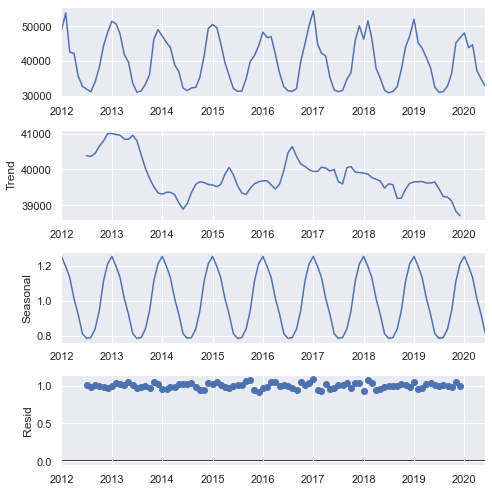

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
conso = conso[['predict']]
conso_17_19 = conso_17_19[['predict']]
#decomp_x = seasonal_decompose(conso_17_19,  model='multiplicative')
decomp_x = seasonal_decompose(conso,  model='multiplicative')
decomp_x.plot()
plt.show()

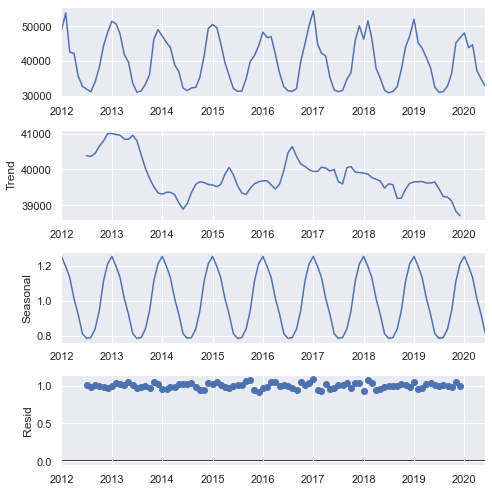

In [49]:
decomp_x.plot()
plt.show()

In [50]:
# merge_cons_temp['trend'] = list(decomp_x_2.trend)
# merge_cons_temp_trend = merge_cons_temp.dropna(axis=0)

### Résidus 

In [51]:
residu = pd.DataFrame({"residus":decomp_x.resid})
residu.dropna(inplace=True)

In [52]:
shapiro(list(residu['residus']))

- Test de Shapiro-Wilk :
 
Valeur critique :  0.8423876762390137
 
Sachant que les données sont normalement distribuées, l'hypothèse 0 n'est pas rejetée.


In [53]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(list(residu['residus']), lags=elt)[1].mean()))

Retard : p-value
6 : 0.06441887889483285
12 : 0.03221701463507313
18 : 0.02147800997683187
24 : 0.016108507482720368
30 : 0.012886805986180062
36 : 0.010739004988483434


C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


#### Après correction 

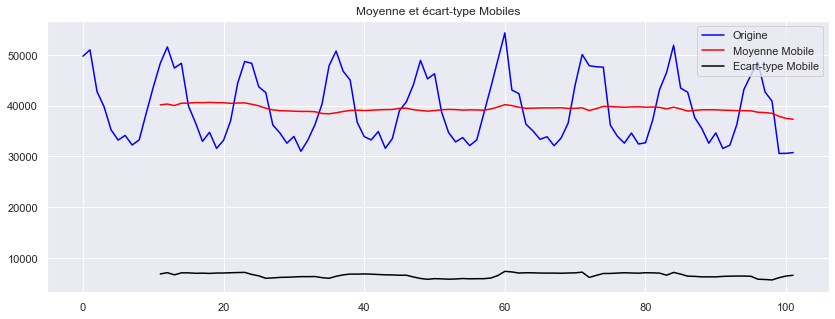

 
 
Statistiques ADF : -0.6731855773790753
p-value : 0.85357336977043
Valeurs Critiques :
	1%: -3.505190196159122
	5%: -2.894232085048011
	10%: -2.5842101234567902
 
La série temporelle n'est pas stationnaire


In [54]:
get_stationarity(merge_cons_temp['serie_cor'])

### Moyennes mobiles  

In [55]:
list_df_mois = []
for i in list(merge_cons_temp['Année'].unique()):
    list_df_mois.append(merge_cons_temp[merge_cons_temp['Année'] == i])

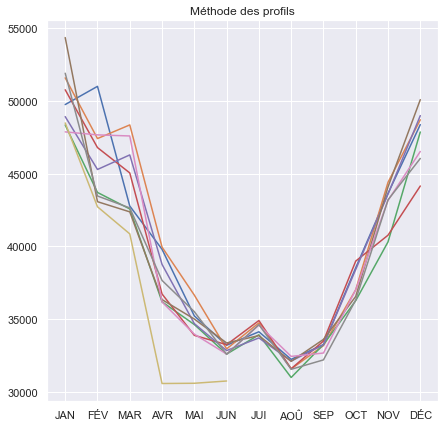

In [56]:
sns.set(rc={'figure.figsize':(7,7)})
for i in range(0,len(list_df_mois)):
    plt.plot(list_df_mois[i]['Mois'],list_df_mois[i]['serie_cor'],label=list_df_mois[i]['Année'].unique())
    
plt.title('Méthode des profils')
plt.show()

In [57]:
#merge_cons_temp.reset_index(inplace=True)

In [58]:
conso2 = merge_cons_temp.set_index('date').asfreq('D')[["Année","Mois","Consommation_totale","température","predict","serie_cor"]]
conso2.dropna(axis=0,inplace=True)
conso_17_19 = merge_17_19.set_index('date').asfreq('D')
conso_17_19.dropna(axis=0,inplace=True)
#conso.reset_index(inplace=True)

In [59]:
conso2['serie_cor'] = np.around(conso2['serie_cor'],decimals=0)
conso2['serie_cor'] = conso2['serie_cor'].astype(int)
# conso_17_19['serie_cor'] = np.around(conso_17_19['serie_cor'],decimals=0)
# conso_17_19['serie_cor'] = conso_17_19['serie_cor'].astype(int)

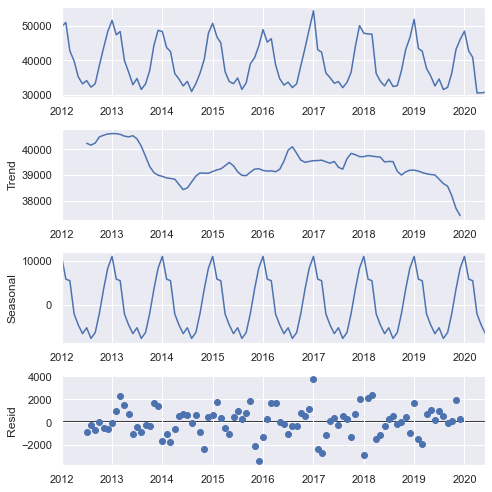

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
conso2 = conso2[['serie_cor']]
#conso_17_19 = conso_17_19[['serie_cor']]
#decomp_x = seasonal_decompose(conso_17_19,  model='multiplicative')
decomp_x_2 = seasonal_decompose(conso2,  model='additive')
decomp_x_2.plot()
plt.show()

In [61]:
residu_serie_corrigé = pd.DataFrame({"residus":decomp_x_2.resid})
residu_serie_corrigé.dropna(inplace=True)

In [62]:
shapiro(list(residu_serie_corrigé['residus']))

- Test de Shapiro-Wilk :
 
Valeur critique :  0.7528535723686218
 
Sachant que les données sont normalement distribuées, l'hypothèse 0 n'est pas rejetée.


In [63]:
print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(list(residu_serie_corrigé['residus']), lags=elt)[1].mean()))

Retard : p-value
6 : 0.021636677497586073
12 : 0.010976305443241819
18 : 0.007317549591866802
24 : 0.005488162511825997
30 : 0.004390530013942482
36 : 0.003658775011660711


C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## Tests

#### Avant correction 

In [64]:
merge_cons_temp.set_index('date',inplace=True)

In [65]:
merge_cons_temp

,Année,Mois,Consommation_totale,température,predict,residus,residus_standardisé,température_moy,serie_cor
date,,,,,,,,,
2012-01-01,2012,JAN,51086,367,48690.113890,2395.886110,1.323871,11.838710,49740.670250
2012-02-01,2012,FÉV,54476,471,53767.927568,708.072432,0.396158,16.821429,50990.214975
2012-03-01,2012,MAR,43156,241,42538.147319,617.852681,0.338861,7.774194,42775.037980
2012-04-01,2012,AVR,40176,234,42196.371398,-2020.371398,-1.107873,7.800000,39803.643445
2012-05-01,2012,MAI,35257,101,35702.628906,-445.628906,-0.244677,3.258065,35228.958924
...,...,...,...,...,...,...,...,...,...
2020-02-01,2020,FÉV,43358,267,43807.600738,-449.600738,-0.246800,9.535714,42723.003016
2020-03-01,2020,MAR,41486,284,44637.627974,-3151.627974,-1.731338,9.161290,40862.573048
2020-04-01,2020,AVR,30658,133,37265.033115,-6607.033115,-3.623590,4.433333,30589.629878


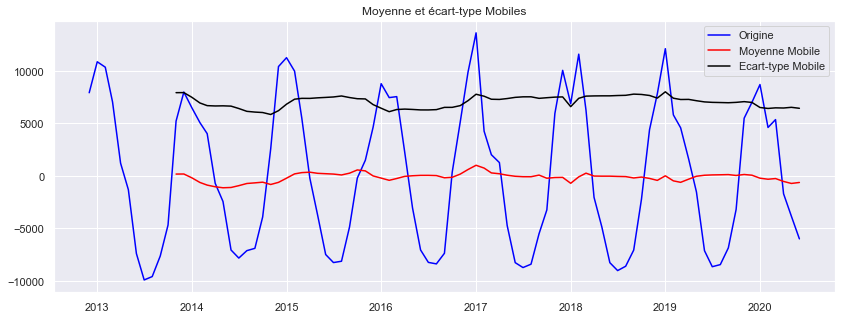

 
 
Statistiques ADF : -7.412446497321032
p-value : 7.075794910016156e-11
Valeurs Critiques :
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
 
La série temporelle est stationnaire


In [66]:
rolling_mean = merge_cons_temp['predict'].rolling(window=12).mean()
merge_cons_temp_mean = merge_cons_temp['predict'] - rolling_mean
merge_cons_temp_mean.dropna(inplace=True)
get_stationarity(merge_cons_temp_mean)

In [67]:
decomp_x_2.seasonal

date
2012-01-01    11015.010417
2012-02-01     5831.171131
2012-03-01     5480.343750
2012-04-01    -2071.668155
2012-05-01    -4548.150298
                  ...     
2020-02-01     5831.171131
2020-03-01     5480.343750
2020-04-01    -2071.668155
2020-05-01    -4548.150298
2020-06-01    -6551.537202
Name: seasonal, Length: 102, dtype: float64

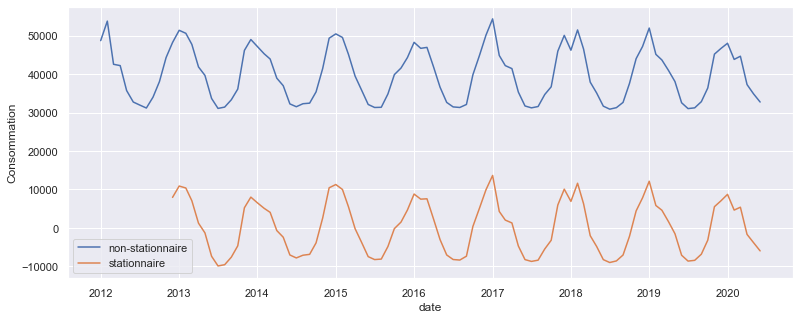

In [68]:
sns.set(rc={'figure.figsize':(13,5)})
plt.plot(merge_cons_temp.index,merge_cons_temp['predict'],label="non-stationnaire")
plt.plot(list(merge_cons_temp_mean.index),list(merge_cons_temp_mean),label='stationnaire')
plt.ylabel('Consommation')
plt.xlabel('date')
plt.legend()
plt.savefig('C:/Users/gormt/Documents/OC/P09_Théo_Fauvel/capture_reg_avant-après.jpg')
plt.show()

In [69]:
trend = pd.DataFrame({"trend":decomp_x_2.trend})
trend.dropna(inplace=True)

In [70]:
decomp_x.trend.unique()

array([           nan, 40383.70833333, 40363.33333333, 40446.75      ,
       40648.20833333, 40798.75      , 41002.16666667, 41004.20833333,
       40977.75      , 40959.41666667, 40849.54166667, 40845.45833333,
       40955.29166667, 40810.875     , 40412.16666667, 40031.70833333,
       39750.91666667, 39516.95833333, 39346.08333333, 39305.41666667,
       39360.375     , 39360.375     , 39293.25      , 39067.45833333,
       38886.41666667, 39039.        , 39354.33333333, 39582.20833333,
       39655.45833333, 39631.04166667, 39578.16666667, 39563.91666667,
       39517.08333333, 39578.125     , 39865.        , 40056.25      ,
       39850.79166667, 39549.70833333, 39340.16666667, 39297.41666667,
       39470.33333333, 39598.5       , 39651.375     , 39679.875     ,
       39683.95833333, 39568.        , 39452.04166667, 39588.33333333,
       39968.75      , 40465.125     , 40642.125     , 40367.5       ,
       40153.875     , 40084.70833333, 39993.16666667, 39944.33333333,
      

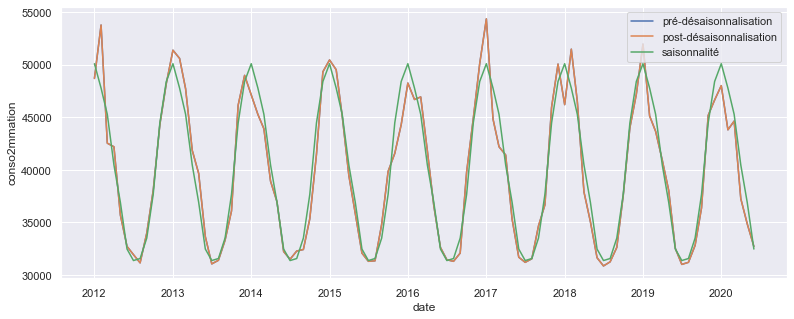

In [71]:
sns.set(rc={'figure.figsize':(13,5)})
plt.plot(conso.index,conso['predict'],label="pré-désaisonnalisation")
plt.plot(list(conso.index),list(conso['predict']-decomp_x.seasonal),label='post-désaisonnalisation')
plt.plot(list(decomp_x.seasonal.index),list(decomp_x.seasonal*40000),label='saisonnalité')
plt.ylabel('conso2mmation')
plt.xlabel('date')
plt.legend()
plt.savefig('C:/Users/gormt/Documents/OC/P09_Théo_Fauvel/capture_reg_avant-après.jpg')
plt.show()
conso['serie_desaison'] = conso['predict']-decomp_x.seasonal

C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


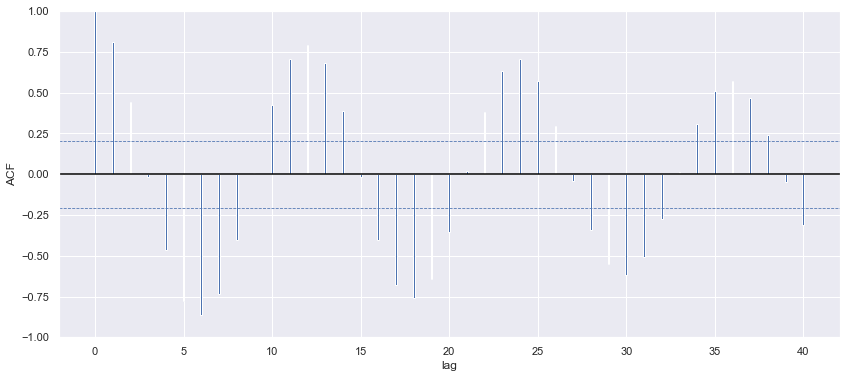

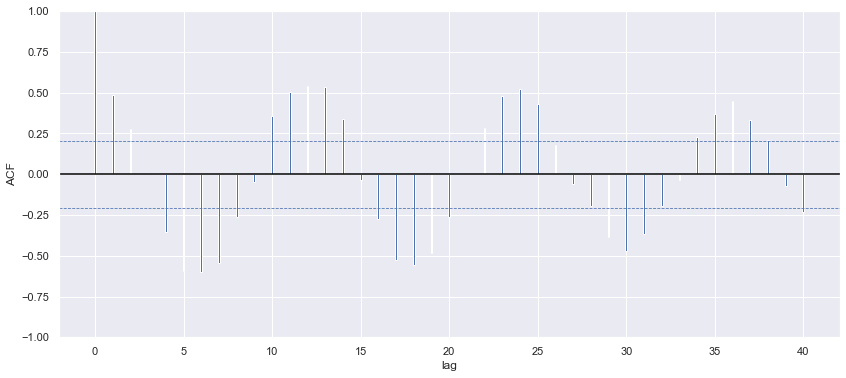

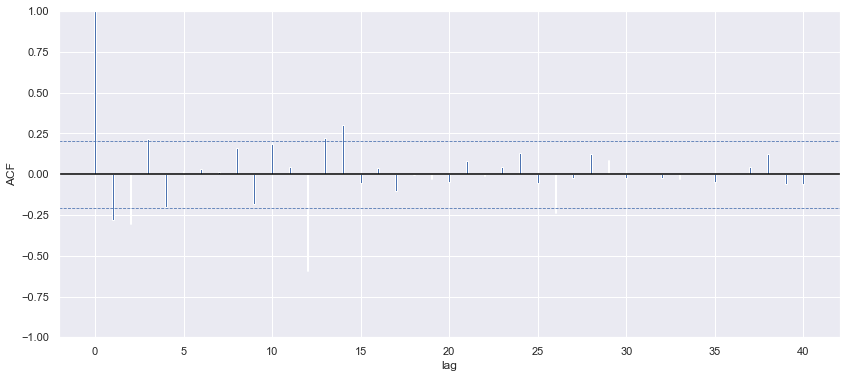

In [72]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf

y_len = len(merge_cons_temp_mean) # variable nécessaire pour l'utilisation de plot_sortie_acf
plot_sortie_acf(acf(np.asarray(merge_cons_temp_mean)), y_len)

y_dif1 = merge_cons_temp_mean - merge_cons_temp_mean.shift(1)
plot_sortie_acf(acf(np.asarray(y_dif1[1:])), y_len)

y_dif_1_12 = y_dif1 - y_dif1.shift(12)
plot_sortie_acf(acf(np.asarray(y_dif_1_12[13:])), y_len)

La fonction d'autocovariance est lentement décroissante vers 0. Par conséquent, les données ne sont pas stationnaires.

#### Après correction 

In [73]:
#merge_cons_temp.set_index('date',inplace=True)

In [74]:
# rolling_mean = merge_cons_temp['serie_cor'].rolling(window=12).mean()
# merge_cons_temp_mean2 = merge_cons_temp['serie_cor'] - rolling_mean
# merge_cons_temp_mean2.dropna(inplace=True)
# get_stationarity(merge_cons_temp_mean2)

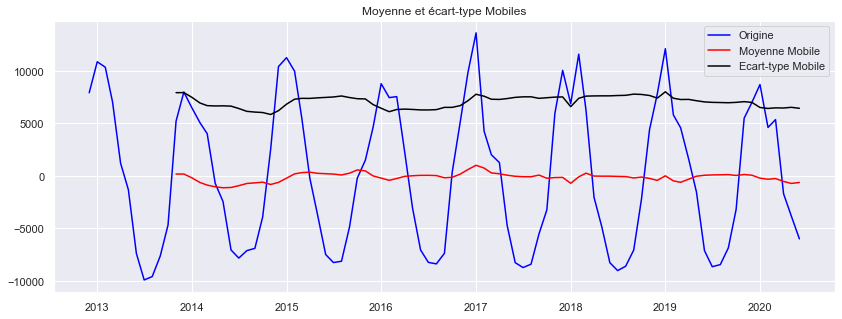

 
 
Statistiques ADF : -7.412347337433142
p-value : 7.079820273671001e-11
Valeurs Critiques :
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
 
La série temporelle est stationnaire


In [75]:
rolling_mean = conso['serie_desaison'].rolling(window=12).mean()
merge_cons_temp_mean2 = conso['serie_desaison'] - rolling_mean
merge_cons_temp_mean2.dropna(inplace=True)
get_stationarity(merge_cons_temp_mean2)

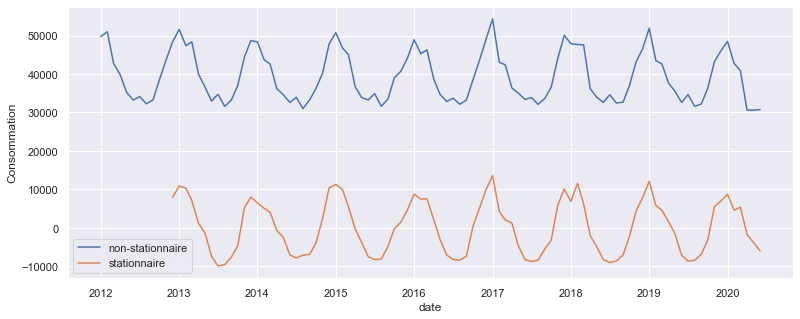

In [97]:
sns.set(rc={'figure.figsize':(13,5)})
plt.plot(merge_cons_temp.index,merge_cons_temp['serie_cor'],label="non-stationnaire")
plt.plot(list(merge_cons_temp_mean2.index),list(merge_cons_temp_mean2),label='stationnaire')
plt.ylabel('Consommation')
plt.xlabel('date')
plt.legend()
plt.savefig('C:/Users/gormt/Documents/OC/P09_Théo_Fauvel/capture_reg_avant-après.jpg')
plt.show()

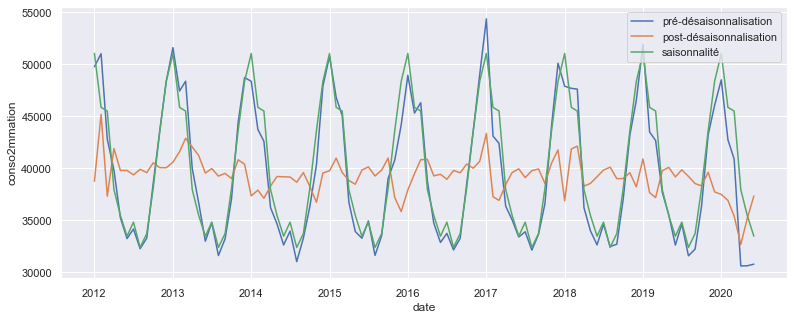

In [77]:
sns.set(rc={'figure.figsize':(13,5)})
plt.plot(conso2.index,conso2['serie_cor'],label="pré-désaisonnalisation")
plt.plot(list(conso2.index),list(conso2['serie_cor']-decomp_x_2.seasonal),label='post-désaisonnalisation')
plt.plot(list(decomp_x_2.seasonal.index),list(decomp_x_2.seasonal+40000),label='saisonnalité')
plt.ylabel('conso2mmation')
plt.xlabel('date')
plt.legend()
plt.savefig('C:/Users/gormt/Documents/OC/P09_Théo_Fauvel/capture_reg_avant-après.jpg')
plt.show()

## Holt-Winters 

In [78]:
merge_cons_temp_mean = pd.DataFrame({'date':merge_cons_temp_mean2.index,'predict_rol':list(merge_cons_temp_mean2)})

In [79]:
from math import log
log_predict = []
#for i in list(merge_cons_temp_mean['predict_rol']):
#log_predict.append(log(i,10))

merge_cons_temp_mean['log_predict_rol'] = merge_cons_temp_mean['predict_rol']+10000

C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


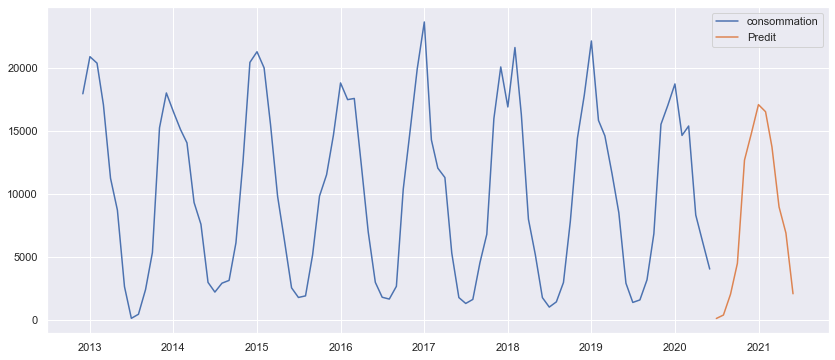

In [80]:
from statsmodels.tsa.api import ExponentialSmoothing

#merge_cons_temp.set_index('date', inplace=True)

hw = ExponentialSmoothing(np.asarray(merge_cons_temp_mean['log_predict_rol']), seasonal_periods=12, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(merge_cons_temp_mean['date'],merge_cons_temp_mean['log_predict_rol'], label='consommation')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean['log_predict_rol'])-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.show()

In [81]:
#merge_cons_temp_mean['date'] = pd.to_datetime(merge_cons_temp_mean['date'])

C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


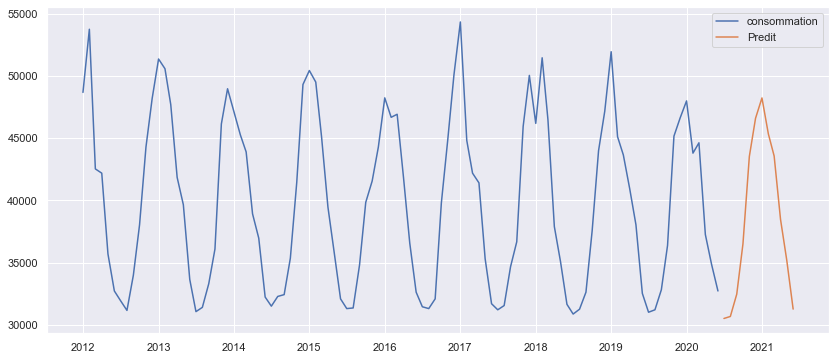

In [82]:
from statsmodels.tsa.api import ExponentialSmoothing

#merge_cons_temp.set_index('date', inplace=True)

hw = ExponentialSmoothing(np.asarray(merge_cons_temp['predict']), seasonal_periods=12, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(merge_cons_temp['predict'], label='consommation')
plt.plot(pd.date_range(merge_cons_temp.index[len(merge_cons_temp['predict'])-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.show()

### Modèle AR 

In [83]:
from statsmodels.tsa.ar_model import AR
mod = AR(merge_cons_temp_mean['predict_rol'])
res = mod.fit(maxlag= 2, ic= 'aic')
res.summary()
#last_hour = merge_cons_temp_mean.index[[len(merge_cons_temp_mean)-1]]
#pred = res.predict(start=last_hour[0],end = last_hour[0])

C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      p  -                  r                  e
Model:                          AR(2)   Log Likelihood                -838.138
Method:                          cmle   S.D. of innovations           2976.029
Date:                Mon, 17 May 2021   AIC                             16.087
Time:                        18:04:39   BIC                             16.198
Sample:                             0   HQIC                            16.132
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -72.1147    321.196     -0.225      0.822    -701.647     557.418
L1.predict_rol     1.3323      0.082     16.185      0.000       1.171       1.494
L2.predict_rol    -0.6349      0.082     -7.755      0.000      -0.795      -0.474
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0492           -0.6886j            1.2550           -0.0924
AR.2            1.0492           +0.6886j            1.2550            0.0924
-----------------------------------------------------------------------------
"""

### Modèle ARMA

In [84]:
import statsmodels.api as sm
mod = sm.tsa.ARMA(merge_cons_temp_mean['predict_rol'],(1, 2)).fit(mean='nc', disp=0)
#res = mod.fit(maxlag= 2, ic= 'aic')
mod.summary()

C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            predict_rol   No. Observations:                   91
Model:                     ARMA(1, 2)   Log Likelihood                -891.791
Method:                       css-mle   S.D. of innovations           4293.516
Date:                Mon, 17 May 2021   AIC                           1793.583
Time:                        18:04:39   BIC                           1806.137
Sample:                             0   HQIC                          1798.648
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.4040    162.629     -0.033      0.973    -324.150     313.342
ar.L1.predict_rol     0.8460      0.062     13.745      0.000       0.725       0.967
ma.L1.predict_rol    -0.2268      0.056     -4.086      0.000      -0.336      -0.118
ma.L2.predict_rol    -0.7732      0.053    -14.602      0.000      -0.877      -0.669
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1821           +0.0000j            1.1821            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2934           +0.0000j            1.2934            0.5000
-----------------------------------------------------------------------------
"""

In [85]:
# Vérifier la stationnalité du modèle 
# Quels tests faut-il pour déterminer le bon modèle à utiliser
# Faire les différents modèles (AR, MA, ARIMA, ARMA) pour comparaison.
# Que faire le modèle = pas stationnaire ? = stationnaire ? Quel est le bon modèle ?
#http://python-simple.com/python-matplotlib/graphes-multiples.php

## Modèle SARIMA 

Modèle 1 :

In [86]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(merge_cons_temp_mean['predict_rol']), order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -700.104
Date:                            Mon, 17 May 2021   AIC                           1410.207
Time:                                    18:04:41   BIC                           1421.991
Sample:                                         0   HQIC                          1414.924
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1543      0.099      1.561      0.119      -0.039       0.348
ma.L1         -0.9999      0.174     -5.744      0.000      -1.341      -0.659
ar.S.L12      -0.3090      0.116     -2.675      0.007      -0.535      -0.083
ma.S.L12      -0.7235      0.171     -4.221      0.000      -1.059      -0.388
sigma2      2.845e+06   6.12e-08   4.64e+13      0.000    2.84e+06    2.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.43   Prob(JB):                         0.58
Heteroskedasticity (H):               0.61   Skew:                             0.28
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.88e+28. Standard errors may be unstable.
"""

In [87]:
print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

Retard : p-value
6 : 9.056452893726479e-07
12 : 4.528300576352307e-07
18 : 3.019101802397365e-07
24 : 2.264352137635801e-07
30 : 1.811578948556107e-07
36 : 1.51152750789918e-07


C:\Users\gormt\miniconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Modèle 2 :

In [88]:
# model2 = SARIMAX(np.asarray(merge_cons_temp_mean['predict_rol']), order=(1,1,1), seasonal_order=(1,1,0,12))
# results2 = model2.fit()
# results2.summary()

In [89]:
# print('Retard : p-value')
# for elt in [6, 12, 18, 24, 30, 36]:
#     print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

Modèle 3 :

In [90]:
# model3 = SARIMAX(np.asarray(merge_cons_temp_mean['trend']), order=(1,1,0), seasonal_order=(1,1,0,12))
# results3 = model3.fit()
# results3.summary()

In [91]:
# print('Retard : p-value')
# for elt in [6, 12, 18, 24, 30, 36]:
#     print('{} : {}'.format(elt, acorr_ljungbox(results3.resid, lags=elt)[1].mean()))

In [92]:
pred_model1 = results1.get_forecast(12)
pred = pred_model1.predicted_mean
pred_l = [elt[0] for elt in pred_model1.conf_int(alpha=0.05)]
pred_u = [elt[1] for elt in pred_model1.conf_int(alpha=0.05)]

In [93]:
merge_cons_temp_mean.head()

,date,predict_rol,log_predict_rol
0,2012-12-01,7929.956657,17929.956657
1,2013-01-01,10879.164385,20879.164385
2,2013-02-01,10362.722399,20362.722399
3,2013-03-01,7051.451323,17051.451323
4,2013-04-01,1220.988409,11220.988409


In [94]:
merge_cons_temp_mean.index[len(merge_cons_temp_mean)-1]

90

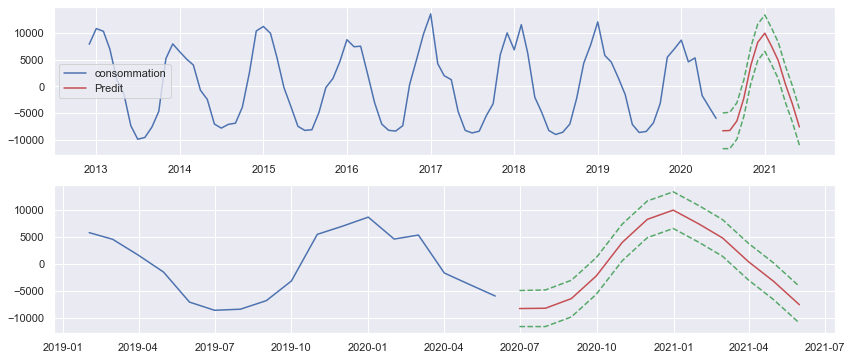

In [95]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(merge_cons_temp_mean['date'],merge_cons_temp_mean['predict_rol'], label='consommation')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.subplot(212)
plt.plot(merge_cons_temp_mean[merge_cons_temp_mean['date'] > '2019']['date'],merge_cons_temp_mean[merge_cons_temp_mean['date'] > '2019']['predict_rol'], label='consommation')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(merge_cons_temp_mean['date'][len(merge_cons_temp_mean)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.show()

In [96]:
merge_cons_temp_nan = merge_cons_temp_mean
#.dropna(axis=0)